In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CAPSTONE/symbipredict_2022.csv'


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Load dataset
# file_path = 'path_to_your_dataset.csv'  # Ganti dengan path dataset Anda
dataset = pd.read_csv(file_path)


In [ ]:
# Mengganti spasi dengan underscore pada nama kolom
dataset.columns = dataset.columns.str.replace(' ', '')

# Simpan dataset yang telah diperbaiki
dataset.to_csv('/content/drive/MyDrive/CAPSTONE/symbipredict_2022.csv', index=False)

print("Nama kolom setelah diperbaiki:")
print(dataset.columns)

Nama kolom setelah diperbaiki:
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [ ]:
# Hitung jumlah nilai 1 di setiap kolom
jumlah_1_per_kolom = dataset.sum(axis=0)

# Cari kolom yang seluruh nilainya 0
kolom_nol_semua = jumlah_1_per_kolom[jumlah_1_per_kolom == 0].index.tolist()

# Hapus kolom yang seluruh nilainya 0
data_bersih = dataset.drop(columns=kolom_nol_semua)

# Tampilkan informasi
print("Jumlah nilai 1 di setiap kolom:")
print(jumlah_1_per_kolom)
print(f"Jumlah kolom sebelum dibersihkan: {dataset.shape[1]}")
print(f"Kolom yang dihapus: {kolom_nol_semua}")
print(f"Jumlah kolom setelah dibersihkan: {data_bersih.shape[1]}")

# # Simpan dataset baru jika diperlukan
# data_bersih.to_csv('dataset_bersih.csv', index=False)

Jumlah nilai 1 di setiap kolom:
itching                                                               684
skin_rash                                                             793
nodal_skin_eruptions                                                  109
continuous_sneezing                                                   224
shivering                                                             109
                                              ...                        
inflammatory_nails                                                    115
blister                                                               115
red_sore_around_nose                                                  115
yellow_crust_ooze                                                     115
prognosis               Fungal InfectionFungal InfectionFungal Infecti...
Length: 133, dtype: object
Jumlah kolom sebelum dibersihkan: 133
Kolom yang dihapus: ['fluid_overload']
Jumlah kolom setelah dibersihkan: 132


In [ ]:
# Daftar nama kolom baru dalam Bahasa Indonesia
nama_kolom_baru = ['gatal', 'ruam kulit', 'erupsi kulit nodal', 'bersin terus menerus', 'menggigil', 'kedinginan', 'nyeri sendi', 'nyeri perut', 'asam lambung', 'luka di lidah', 'penyusutan otot', 'muntah', 'sensasi terbakar saat buang air kecil', 'bercak saat buang air kecil', 'kelelahan', 'penambahan berat badan', 'kecemasan', 'tangan dan kaki dingin', 'perubahan mood', 'penurunan berat badan', 'gelisah', 'lesu', 'bercak di tenggorokan', 'gula darah tidak teratur', 'batuk', 'demam tinggi', 'mata cekung', 'sesak napas', 'berkeringat', 'dehidrasi', 'gangguan pencernaan', 'sakit kepala', 'kulit kekuningan', 'urine gelap', 'mual', 'hilang nafsu makan', 'nyeri di belakang mata', 'sakit punggung', 'sembelit', 'sakit perut', 'diare', 'demam ringan', 'urine kuning', 'mata kuning', 'gagal hati akut', 'pembengkakan perut', 'kelenjar getah bening bengkak', 'kelelahan', 'penglihatan buram', 'dahak', 'iritasi tenggorokan', 'mata merah', 'tekanan sinus', 'pilek', 'hidung tersumbat', 'nyeri dada', 'kelemahan di anggota tubuh', 'detak jantung cepat', 'nyeri saat buang air besar', 'nyeri di area anus', 'tinja berdarah', 'iritasi di anus', 'nyeri leher', 'pusing', 'kram', 'memar', 'obesitas', 'kaki bengkak', 'pembuluh darah bengkak', 'wajah dan mata bengkak', 'tiroid membesar', 'kuku rapuh', 'pembengkakan ekstremitas', 'rasa lapar berlebihan', 'kontak di luar nikah', 'bibir kering dan bertingling', 'bicara cadel', 'nyeri lutut', 'nyeri sendi pinggul', 'kelemahan otot', 'leher kaku', 'sendi bengkak', 'kekakuan pergerakan', 'gerakan berputar', 'kehilangan keseimbangan', 'ketidakstabilan', 'kelemahan satu sisi tubuh', 'hilang indra penciuman', 'ketidaknyamanan kandung kemih', 'bau urine menyengat', 'rasa ingin buang air kecil terus', 'gas keluar', 'gatal dalam', 'penampilan toksik', 'depresi', 'iritabilitas', 'nyeri otot', 'altered sensorium', 'bintik merah di tubuh', 'nyeri perut', 'menstruasi tidak normal', 'bercak dischromic', 'mata berair', 'nafsu makan meningkat', 'poliuria', 'riwayat keluarga', 'dahak lendir', 'dahak berkarat', 'kurang konsentrasi', 'gangguan penglihatan', 'menerima transfusi darah', 'menerima suntikan tidak steril', 'koma', 'pendarahan lambung', 'pembesaran perut', 'riwayat konsumsi alkohol', 'kelebihan cairan', 'darah di dahak', 'vena menonjol di betis', 'palpitasi', 'nyeri saat berjalan', 'jerawat bernanah', 'komedo', 'bekas luka', 'kulit mengelupas', 'debu seperti perak', 'lekukan kecil di kuku', 'kuku meradang', 'lepuh', 'luka merah di hidung', 'kerak kuning mengalir', 'diagnosa']

# Mengubah nama kolom dataset
data_bersih.columns = nama_kolom_baru

# Simpan dataset yang telah diperbaiki
data_bersih.to_csv('/content/drive/MyDrive/CAPSTONE/symbipredict_2022.csv', index=False)

print("Nama kolom berhasil diubah dan disimpan ke file baru!")

Nama kolom berhasil diubah dan disimpan ke file baru!


In [ ]:
print(data_bersih['diagnosa'].unique())

['Fungal Infection' 'Allergy' 'GERD' 'Chronic Cholestasis' 'Drug Reaction'
 'Peptic Ulcer Disease' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical Spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chickenpox' 'Dengue'
 'Typhoid' 'Hepatitis A' 'Hepatitis B' 'Hepatitis C' 'Hepatitis D'
 'Hepatitis E' 'Alcoholic Hepatitis' 'Tuberculosis' 'Common Cold'
 'Pneumonia' 'Dimorphic Hemmorhoids (piles)' 'Heart Attack'
 'Varicose Veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthritis' 'Arthritis' 'Vertigo' 'Acne' 'Urinary Tract Infection'
 'Psoriasis' 'Impetigo']


In [ ]:
# Definisikan dictionary untuk penerjemahan
prognosis_mapping = {
    'Fungal Infection': 'Infeksi Jamur',
    'Allergy': 'Alergi',
    'GERD': 'Penyakit Refluks Gastroesofagus (GERD)',
    'Chronic Cholestasis': 'Cholestasis Kronis',
    'Drug Reaction': 'Reaksi Obat',
    'Peptic Ulcer Disease': 'Penyakit Tukak Lambung',
    'AIDS': 'AIDS',
    'Diabetes': 'Diabetes',
    'Gastroenteritis': 'Gastroenteritis',
    'Bronchial Asthma': 'Asma Bronkial',
    'Hypertension': 'Hipertensi',
    'Migraine': 'Migrain',
    'Cervical Spondylosis': 'Spondilosis Servikal',
    'Paralysis (brain hemorrhage)': 'Paralisia (perdarahan otak)',
    'Jaundice': 'Penyakit Kuning',
    'Malaria': 'Malaria',
    'Chickenpox': 'Cacar Air',
    'Dengue': 'Dengue',
    'Typhoid': 'Tifus',
    'Hepatitis A': 'Hepatitis A',
    'Hepatitis B': 'Hepatitis B',
    'Hepatitis C': 'Hepatitis C',
    'Hepatitis D': 'Hepatitis D',
    'Hepatitis E': 'Hepatitis E',
    'Alcoholic Hepatitis': 'Hepatitis Alkoholik',
    'Tuberculosis': 'Tuberkulosis',
    'Common Cold': 'Flu Biasa',
    'Pneumonia': 'Pneumonia',
    'Dimorphic Hemmorhoids (piles)': 'Wasir Dimorfik',
    'Heart Attack': 'Serangan Jantung',
    'Varicose Veins': 'Varises',
    'Hypothyroidism': 'Hipotiroidisme',
    'Hyperthyroidism': 'Hipertiroidisme',
    'Hypoglycemia': 'Hipoglikemia',
    'Osteoarthritis': 'Osteoartritis',
    'Arthritis': 'Artritis',
    'Vertigo': 'Vertigo',
    'Acne': 'Jerawat',
    'Urinary Tract Infection': 'Infeksi Saluran Kemih',
    'Psoriasis': 'Psoriasis',
    'Impetigo': 'Impetigo'
}

# Ganti nilai prognosis menjadi dalam Bahasa Indonesia
data_bersih['diagnosa'] = data_bersih['diagnosa'].replace(prognosis_mapping)

# Tampilkan beberapa baris dari dataset untuk memastikan perubahan
print(data_bersih[['diagnosa']].head())

# Simpan dataset yang telah diperbaiki
data_bersih.to_csv('/content/drive/MyDrive/CAPSTONE/datasetpenyakit_fixed.csv', index=False)

        diagnosa
0  Infeksi Jamur
1  Infeksi Jamur
2  Infeksi Jamur
3  Infeksi Jamur
4  Infeksi Jamur


In [ ]:
dataset = data_bersih
# Pisahkan fitur dan target
X = dataset.drop(columns=["diagnosa"])
y = dataset["diagnosa"]

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# Mendapatkan nama kelas
disease_classes = encoder.categories_[0]
print("Disease Classes:", disease_classes)


Disease Classes: ['AIDS' 'Alergi' 'Artritis' 'Asma Bronkial' 'Cacar Air'
 'Cholestasis Kronis' 'Dengue' 'Diabetes ' 'Flu Biasa' 'Gastroenteritis'
 'Hepatitis A' 'Hepatitis Alkoholik' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Hipertiroidisme' 'Hipoglikemia'
 'Hipotiroidisme' 'Hypertension ' 'Impetigo' 'Infeksi Jamur'
 'Infeksi Saluran Kemih' 'Jerawat' 'Malaria' 'Migrain' 'Osteoartritis'
 'Paralisia (perdarahan otak)' 'Penyakit Kuning'
 'Penyakit Refluks Gastroesofagus (GERD)' 'Penyakit Tukak Lambung'
 'Pneumonia' 'Psoriasis' 'Reaksi Obat' 'Serangan Jantung'
 'Spondilosis Servikal' 'Tifus' 'Tuberkulosis' 'Varises' 'Vertigo'
 'Wasir Dimorfik']


In [ ]:
input_layer = Input(shape=(len(X .columns),))
X = Dense(128, activation='relu')(input_layer)
X = Dense(64, activation='relu')(X)
output_layer = Dense(41, activation='softmax')(X)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 131)]             0         
                                                                 
 dense (Dense)               (None, 128)               16896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 41)                2665      
                                                                 
Total params: 27817 (108.66 KB)
Trainable params: 27817 (108.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=15,
                    batch_size=32,
                    verbose=1)

Epoch 1/15
100/100 [==============================] - 1s 4ms/step - loss: 2.2580 - accuracy: 0.7776 - val_loss: 0.4621 - val_accuracy: 1.0000
Epoch 2/15
100/100 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 3/15
100/100 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 4/15
100/100 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 5/15
100/100 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/15
100/100 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 7/15
100/100 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 

In [ ]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Test Loss: 0.0008410533191636205, Test Accuracy: 1.0


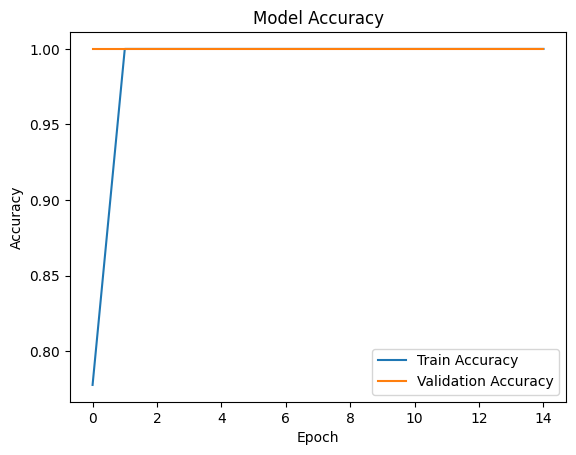

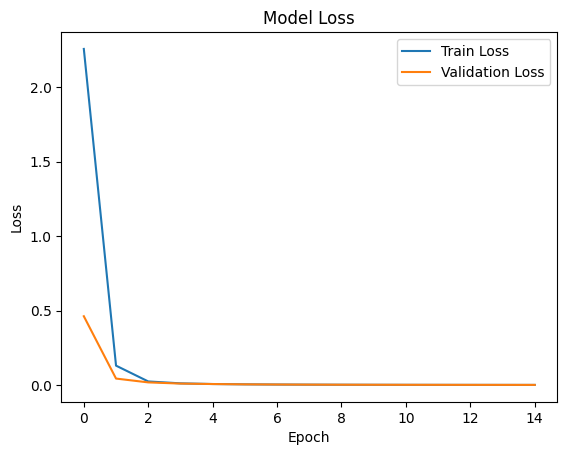

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Contoh input untuk prediksi
# 'gatal','ruam_kulit','erupsi_kulit_nodal','bercak_dischromic'
input_features = ['gatal','ruam_kulit','erupsi_kulit_nodal','bercak_dischromic']
X_df = X_train.copy()
X_sample = [1 if feature in input_features else 0 for feature in X_df.columns]

# Prediksi
X_sample = pd.DataFrame([X_sample])  # Ubah ke DataFrame
prediction = model.predict(X_sample)

# Tampilkan hasil
predicted_class = disease_classes[prediction.argmax()]
print("Predicted Disease:", predicted_class)


1/1 [==============================] - 0s 76ms/step
Predicted Disease: Infeksi Jamur


# TES

In [ ]:
# Ambil semua kolom kecuali kolom target
features = [col for col in dataset.columns if col != 'prognosis']
print("Daftar fitur (tanpa kolom target):", features)

Daftar fitur (tanpa kolom target): ['gatal', 'ruam kulit', 'erupsi kulit nodal', 'bersin terus menerus', 'menggigil', 'kedinginan', 'nyeri sendi', 'nyeri perut', 'asam lambung', 'luka di lidah', 'penyusutan otot', 'muntah', 'sensasi terbakar saat buang air kecil', 'bercak saat buang air kecil', 'kelelahan', 'penambahan berat badan', 'kecemasan', 'tangan dan kaki dingin', 'perubahan mood', 'penurunan berat badan', 'gelisah', 'lesu', 'bercak di tenggorokan', 'gula darah tidak teratur', 'batuk', 'demam tinggi', 'mata cekung', 'sesak napas', 'berkeringat', 'dehidrasi', 'gangguan pencernaan', 'sakit kepala', 'kulit kekuningan', 'urine gelap', 'mual', 'hilang nafsu makan', 'nyeri di belakang mata', 'sakit punggung', 'sembelit', 'sakit perut', 'diare', 'demam ringan', 'urine kuning', 'mata kuning', 'gagal hati akut', 'pembengkakan perut', 'kelenjar getah bening bengkak', 'kelelahan', 'penglihatan buram', 'dahak', 'iritasi tenggorokan', 'mata merah', 'tekanan sinus', 'pilek', 'hidung tersumbat

In [ ]:
penyakit = dataset['diagnosa'].unique()
print(penyakit)

['Infeksi Jamur' 'Alergi' 'Penyakit Refluks Gastroesofagus (GERD)'
 'Cholestasis Kronis' 'Reaksi Obat' 'Penyakit Tukak Lambung' 'AIDS'
 'Diabetes ' 'Gastroenteritis' 'Asma Bronkial' 'Hypertension ' 'Migrain'
 'Spondilosis Servikal' 'Paralisia (perdarahan otak)' 'Penyakit Kuning'
 'Malaria' 'Cacar Air' 'Dengue' 'Tifus' 'Hepatitis A' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hepatitis Alkoholik'
 'Tuberkulosis' 'Flu Biasa' 'Pneumonia' 'Wasir Dimorfik'
 'Serangan Jantung' 'Varises' 'Hipotiroidisme' 'Hipertiroidisme'
 'Hipoglikemia' 'Osteoartritis' 'Artritis' 'Vertigo' 'Jerawat'
 'Infeksi Saluran Kemih' 'Psoriasis' 'Impetigo']


In [ ]:
from IPython.display import display
import ipywidgets as widgets
import numpy as np
import pandas as pd

# Mendapatkan daftar fitur dan nama penyakit
features = X_df.columns  # X adalah DataFrame fitur dari dataset
penyakit = disease_classes  # Nama kelas penyakit dari OneHotEncoder

# Fungsi untuk memproses input menjadi array dengan panjang sesuai jumlah fitur
def process_input(input_features, all_features):
    """
    Memproses input gejala menjadi array 2D untuk prediksi.
    Gejala yang tidak diinput diberi nilai 0.
    """
    processed_input = [1 if feature in input_features else 0 for feature in all_features]
    return np.array([processed_input])  # Menambahkan dimensi batch

# Text Area untuk Input Gejala
text_area = widgets.Textarea(
    placeholder='Masukkan nama gejala, dipisahkan dengan koma, misal: feature1,feature2',
    description='Gejala:',
    layout=widgets.Layout(width='100%')
)

# Tombol Prediksi
button = widgets.Button(description='Prediksi')

# Output Area
output = widgets.Output()

# Fungsi untuk Menangani Klik Tombol
def on_button_click(b):
    with output:
        output.clear_output()  # Hapus output sebelumnya
        input_text = text_area.value.strip()
        input_features = [f.strip() for f in input_text.split(',') if f.strip()]
        print("Gejala yang dimasukkan:", input_features)

        # Proses input menjadi array (otomatis panjang 131, dengan nilai 0 untuk yang tidak diinput)
        X_test = process_input(input_features, features)
        print("Array Input Gejala:", X_test)

        # Lakukan prediksi
        prediction = model.predict(X_test)  # Menggunakan model DNN
        print("Hasil Prediksi Probabilitas:", prediction)

        # Menampilkan hasil prediksi
        predicted_index = np.argmax(prediction)  # Indeks kelas dengan probabilitas tertinggi
        predicted_disease = penyakit[predicted_index]  # Nama penyakit berdasarkan indeks

        # Tampilkan hasil
        print("Hasil Prediksi:", predicted_disease)

button.on_click(on_button_click)

# Tampilkan Form dan Output
display(text_area, button, output)


Textarea(value='', description='Gejala:', layout=Layout(width='100%'), placeholder='Masukkan nama gejala, dipi…

Button(description='Prediksi', style=ButtonStyle())

Output()

In [ ]:
export_dir = './saved_model'

tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

30712

In [ ]:
!zip -r saved_model.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 12%)
  adding: saved_model/variables/variables.index (deflated 59%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/saved_model.pb (deflated 86%)


In [ ]:
from google.colab import files
files.download('saved_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>